# Uvrščanje glasbe v žanr
Uvrscanje pesmi v zanr glede na znacilnosti pesmi.

Atributi: 
Danceability - Merilo od 0.0 do 1.0, kako primerna je skladba za ples (na podlagi kombinacije glazbenih elementov (tempo, stabilnost ritma...)).

Acousticness - Merilo od 0.0 do 1.0 ali je skladba akustična.

Energy - Merilo od 0.0 do 1.0, kako intenzivna in aktivna je skladbe.

Instrumentalness - Merilo od 0.0 do 1.0, ali skladba vsebuje vokale.

Liveness - Merilo od 0.0 do 1.0, ali je prisotnot publike (nastop v živo).

Loudness - povprečna glasnot skladbe v decibelih(dB). Tipične vrednosti od -60 do 0 dB.

Speechiness - Merilo od 0.0 do 1.0, kako verjetno je, da je govor v skladbi.

Tempo - BPM (Beats per minute)

Valence - Merilo od 0.0 do 1.0, kako pozitivna je skladba.

Mode - Tonaliteta (dur ali mol) skladbe, vrsto lestvice, iz katere izhaja njena melodična vsebina. Dur je predstavljen z 1, mol pa je 0.

Key - V katerem ključu je skladba. Merilo od -1 do 11 (pr. -1 - ni zaznanega ključa, 0 - C,...)

Time_siginture - Merilo od 3 do 7 (pr. 3 - 3/4, 4 - 4/4,...)

Duration_ms - Dolizna pesmi v mili sekundah.

Pesmi bomo razvrscali v 5 najbolj popularnih zanrov na platformi spotify.

Najbolj popularne zanre najdemo na spletni strani Every Noise: https://everynoise.com/everynoise1d.cgi?scope=all

Vzeli bomo rap, pop, rock, latin, edm in se dodatno klasiko - skupaj 6 zanrov.

Podatke bomo dobil s platforme spotify developer, s pomocjo knjiznjice spotipy v pythonu. 

Pridobili bomo po 15000-20000 pesmi iz vsakega od 6 zanrov, ki smo jih dolocili.

Predvidevam, da naj bi v osnovi naj bi zanre locili na:
- Classical - instrumentalno in akusticnost (atribut Instrumentalness, acousticness)
- Rap - veliko govora (atribut Speechiness)
- Rock - nemoremo plesati (atribut danceability)
- EDM - high temp, high energy (atribut tempo, energy)
- Latin - mozno plesati (atribut danceability)
- pop - vse kar ostane

Predvidevam, da bo najlazje (ugotoviti) lociti klasiko od drugih zanrov, saj je manjsa podobnost. 
Podobna sta si tudi rap in latino, vrjetno jih bo tezje razlociti kot druge.
Podobna sta si tudi EDM in rock, imata oba high energy in high temp. 
Pop ima iz vsakega zanra nekaj, menim, da se se najmanj razlikuje od drugih zanrov, zato bi lahko napoved za pop bila najslabsa.

In [31]:
import warnings
warnings.filterwarnings('ignore')

S pomocjo knjiznjice spotipy in metode search bomo iskali pesmi/albume/playliste/artiste za vsak zanr in jih dodali v data set v 1 od glavnih 6 zanrov. To bomo naredili v python skripti in podatke shranili v .csv datoteko.

Uporaba GenerateData.py skripte. 

1. Pridobil iz spotifya po 200 artistov iz vsakega zanra (skupaj 1200)
2. Od vsakega artista pridobil po 10 albumov (skupaj 12000)
3. Iz vsakega albuma dobil 10 pesmi (skupaj 120000)
4. Izlocil vse duplikate

Na koncu dobil 83698 pesmi. 

In [32]:
import pandas as pd

In [33]:
df_artist = pd.read_csv('Data\Genre\Artists_1.csv', index_col=0)
df_artist.set_index("id", inplace=True)
print(df_artist.columns)

Index(['name', 'genre', 'sub_genre', 'followers'], dtype='object')


In [34]:
for index, row in df_artist.head(5).iterrows():
    print(row['name'], row['genre'], row['followers'])

Drake rap 63278627
Taylor Swift pop 52901693
The Weeknd pop 44618215
Doja Cat pop 18551221
Justin Bieber pop 60515412


In [35]:
print("Artistov v data setu: ", df_artist.shape[0])

Artistov v data setu:  1033


In [36]:
df_album = pd.read_csv('Data\Genre\Albums_2.csv', index_col=0)
df_album.set_index("id", inplace=True)
print(df_album.columns)

Index(['name', 'release_date', 'artist_id', 'genre'], dtype='object')


In [37]:
for index, row in df_album.head(2).iterrows():
    artist_id = row['artist_id']
    print("Album: ", row['name'])
    artist1 = df_artist.loc[artist_id, ['name', 'followers']]
    print("Artist: ", artist1.iloc[0], "(", artist1.iloc[1], ")")
    print()

Album:  Certified Lover Boy
Artist:  Drake ( 63278627 )

Album:  Dark Lane Demo Tapes
Artist:  Drake ( 63278627 )



In [38]:
print("Albumov v data setu: ", df_album.shape[0])

Albumov v data setu:  10911


In [39]:
df_tracks = pd.read_csv('Data\Genre\Tracks_2_AudioF.csv', index_col=(0,1))
df_tracks.set_index("id", inplace=True)
print(df_tracks.columns)

Index(['name', 'artist_id', 'genre', 'album_id', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')


In [40]:
df_tracks.head()

,name,artist_id,genre,album_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,,,,,
2HSmyk2qMN8WQjuGhaQgCk,Champagne Poetry,3TVXtAsR1Inumwj472S9r4,rap,3SpBlxme9WbeQdI9kx7KAV,0.423,0.667,6,-7.012,0,0.326,0.758,0.000000,0.246,0.496,86.743,336511,4
6jy9yJfgCsMHdu2Oz4BGKX,Papi’s Home,3TVXtAsR1Inumwj472S9r4,rap,3SpBlxme9WbeQdI9kx7KAV,0.701,0.741,2,-6.157,1,0.313,0.112,0.000000,0.699,0.588,140.177,178623,4
37Nqx7iavZpotJSDXZWbJ3,Girls Want Girls (with Lil Baby),3TVXtAsR1Inumwj472S9r4,rap,3SpBlxme9WbeQdI9kx7KAV,0.767,0.438,7,-8.726,0,0.290,0.181,0.000000,0.142,0.381,86.975,221980,4
61S79KIVA4I9FXbnsylEHT,In The Bible (with Lil Durk & Giveon),3TVXtAsR1Inumwj472S9r4,rap,3SpBlxme9WbeQdI9kx7KAV,0.686,0.385,7,-8.350,0,0.297,0.614,0.000000,0.131,0.147,143.070,296568,4
4VCbgIdr8ptegWeJpqLVHH,Love All (with JAY-Z),3TVXtAsR1Inumwj472S9r4,rap,3SpBlxme9WbeQdI9kx7KAV,0.730,0.576,2,-5.442,1,0.287,0.354,0.000036,0.150,0.155,92.131,228461,4


In [41]:
genres = ['pop', 'rock', 'rap', 'edm', 'latin', 'classical']
print("Vseh pesmi v data setu: ", df_tracks.shape[0])
print()
for genre in genres:
    print(genre, ":", df_tracks.loc[df_tracks['genre'] == genre].shape[0])


Vseh pesmi v data setu:  83698

pop : 11309
rock : 18330
rap : 11365
edm : 8693
latin : 14129
classical : 19872


# Speechiness
Values: 0.0 - 1.0

In [42]:
import matplotlib.pyplot as plt

In [43]:
def plot_attribute(att):
    plt.figure(figsize = (8, 5))

    for genre in genres:
        df = df_tracks.loc[df_tracks['genre'] == genre][att]
        df.plot(kind='density', label=genre)

    plt.title(att)
    plt.xlabel(att)
    plt.legend(title="Genre", loc=1)
    
    return plt

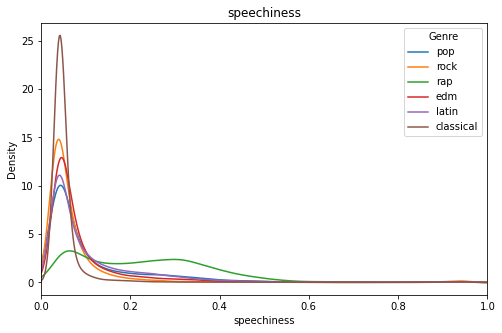

In [44]:
plt = plot_attribute('speechiness')
plt.xlim(0, 1)
plt.show()

In [45]:
def boxplot(att):
    fig, ax = plt.subplots(figsize=(10, 6))
    df_genre = []

    for genre in genres:
        df = df_tracks.loc[df_tracks['genre'] == genre][att]
        df_genre.append(df)

    ax.set_xlabel(att)
    ax.set_yticklabels(genres)
    ax.boxplot(df_genre, showfliers=False, vert=False)
    
    return ax

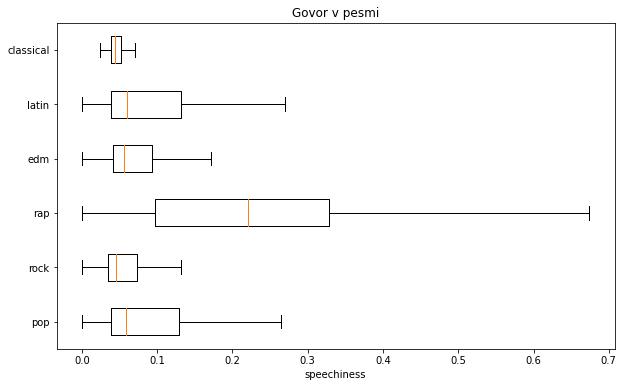

In [46]:
ax = boxplot('speechiness')
ax.set_title("Govor v pesmi")
plt.show()

# Danceability
Values: 0.0 - 1.0

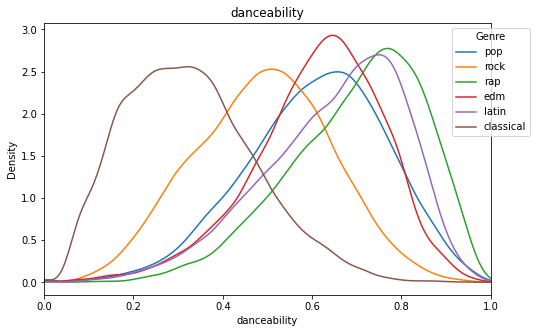

In [47]:
plt = plot_attribute('danceability')
plt.xlim(0, 1)
plt.legend(title="Genre", bbox_to_anchor=(1.1, 1))
plt.show()

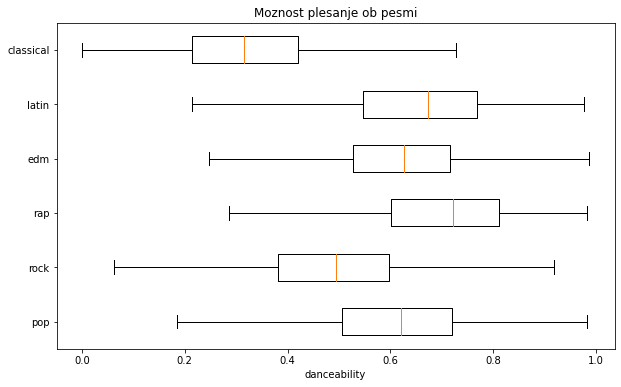

In [48]:
ax  = boxplot('danceability')
ax.set_title("Moznost plesanje ob pesmi")
plt.show()

# Energy
Values: 0.0 - 1.0

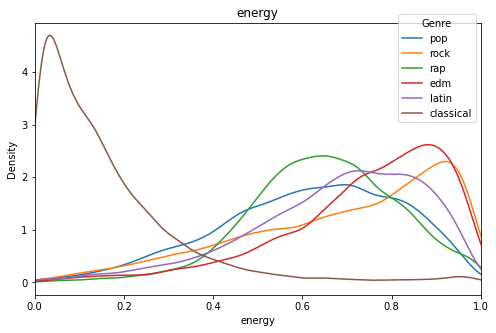

In [49]:
plt = plot_attribute('energy')
plt.legend(title="Genre", bbox_to_anchor=(1, 1.05))
plt.xlim(0, 1)
plt.show()

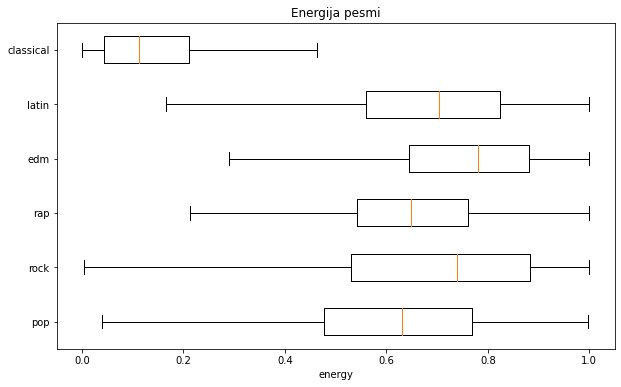

In [50]:
ax  = boxplot('energy')
ax.set_title("Energija pesmi")
plt.show()


# Loudness
Values: ~ (-60 to 0 db)

Normalization needed

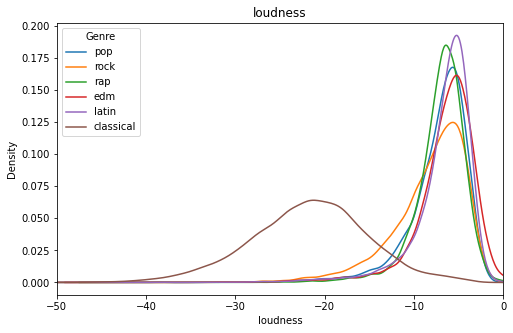

In [51]:
plt = plot_attribute('loudness')
plt.xlim(-50, 0)
plt.legend(loc=0, title="Genre")
plt.show()

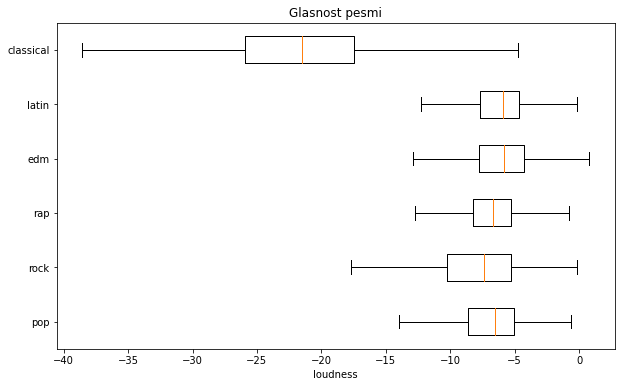

In [52]:
ax = boxplot('loudness')
ax.set_title("Glasnost pesmi")
plt.show()

In [53]:
# Loudnes [-60, 0]
# zato vsem vrednostim prisetejemo + 60 (dobimo samo pizitvne vrednosti)
df_tracks["loudness"] = df_tracks["loudness"] + 60

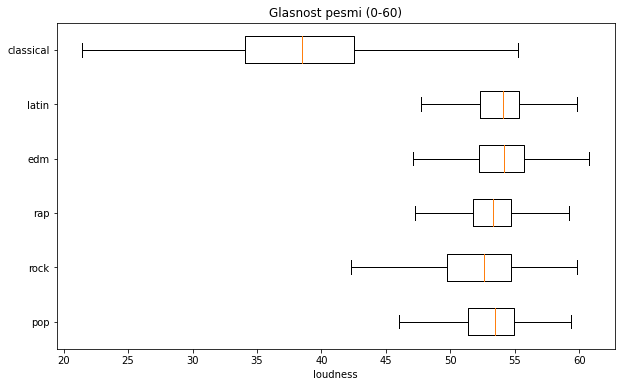

In [54]:
ax = boxplot('loudness')
ax.set_title("Glasnost pesmi (0-60)")
# ax.set_xlim(0, 60)
plt.show()

In [55]:
def normalize(att, df):
    # normaliziramo vrednosti 
    normalized_df=(df[att]-df[att].min())/(df[att].max()-df[att].min())
    new_df = df.drop(att, axis=1)
    new_df = pd.merge(normalized_df, new_df, on='id', how='inner')
    return new_df

In [56]:
# Normalize loudness
df_tracks = normalize('loudness', df_tracks)

In [57]:
df_tracks['loudness'].head()

id
2HSmyk2qMN8WQjuGhaQgCk    0.850311
6jy9yJfgCsMHdu2Oz4BGKX    0.864032
37Nqx7iavZpotJSDXZWbJ3    0.822806
61S79KIVA4I9FXbnsylEHT    0.828840
4VCbgIdr8ptegWeJpqLVHH    0.875505
Name: loudness, dtype: float64

# Acousticness
Values: 0.0 - 1.0

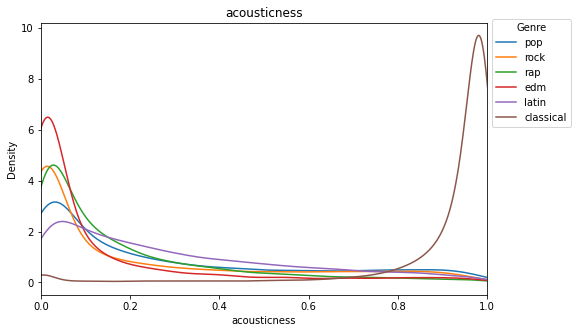

In [58]:
plt = plot_attribute('acousticness')
plt.legend(title="Genre", bbox_to_anchor=(1, 0.6))
plt.xlim(0, 1)
plt.show()

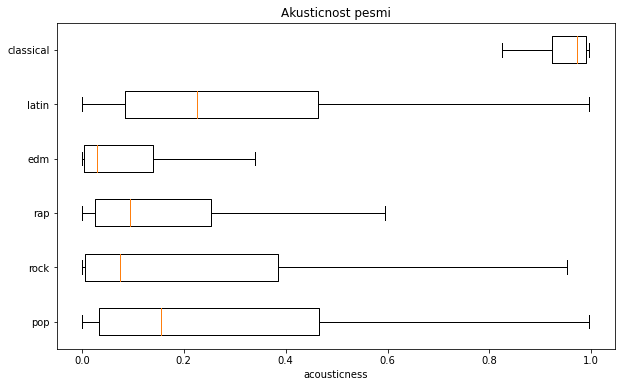

In [59]:
ax  = boxplot('acousticness')
ax.set_title("Akusticnost pesmi")
plt.show()

# Liveness
Values: 0.0 - 1.0

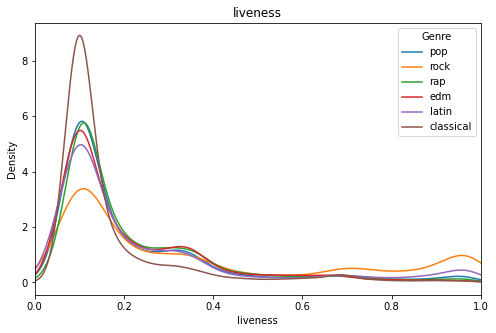

In [60]:
plt = plot_attribute('liveness')
plt.xlim(0, 1)
plt.show()

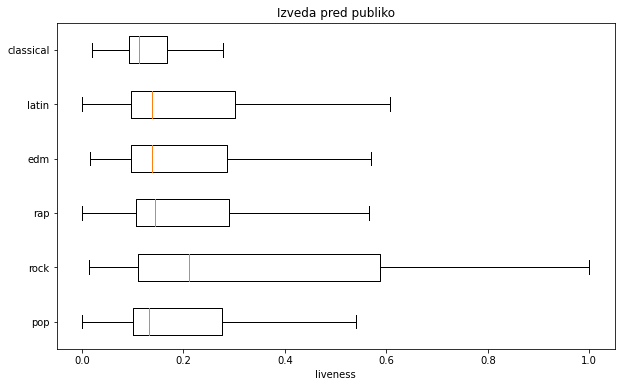

In [61]:
ax  = boxplot('liveness')
ax.set_title("Izveda pred publiko")
plt.show()

# Instrumentalness
Values: 0.0 - 1.0

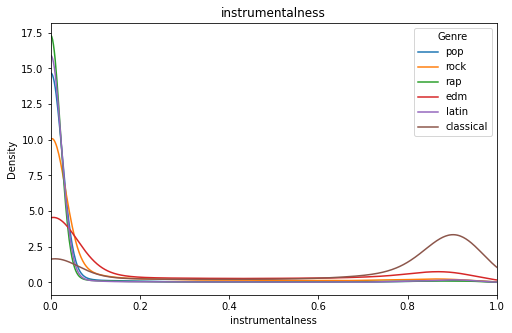

In [62]:
plt = plot_attribute('instrumentalness')
plt.xlim(0, 1)
plt.show()

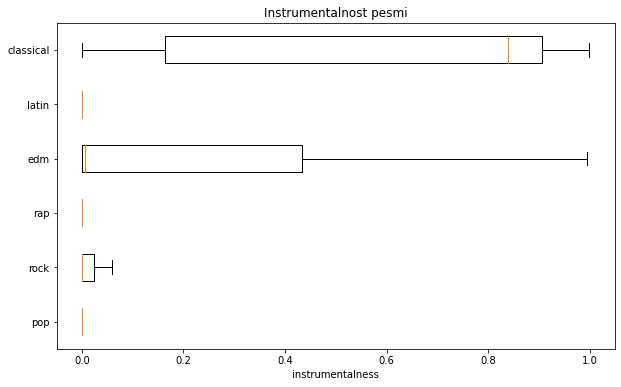

In [63]:
ax  = boxplot('instrumentalness')
ax.set_title("Instrumentalnost pesmi")
plt.show()

# Tempo
Values: in beats per minute (BPM)

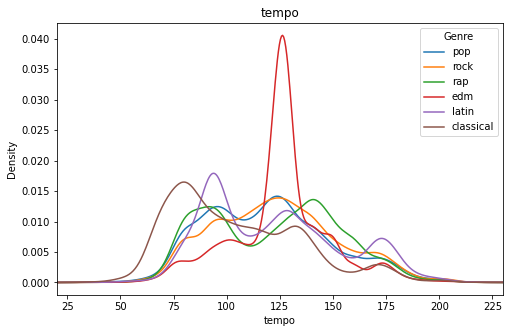

In [64]:
plt = plot_attribute('tempo')
plt.xlim(20, 230)
plt.show()

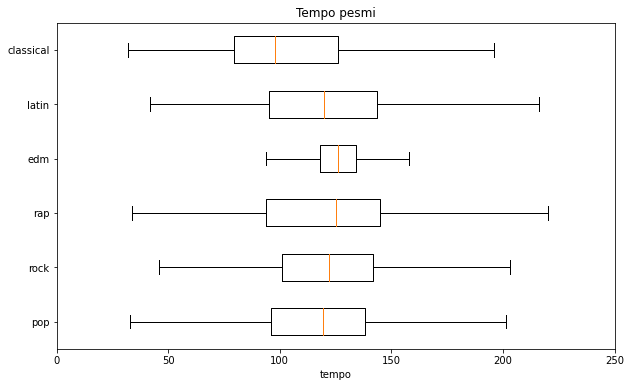

In [65]:
ax  = boxplot('tempo')
ax.set_title("Tempo pesmi")
ax.set_xlim(0, 250)
plt.show()

In [66]:
# Normalize tempo
df_tracks = normalize("tempo", df_tracks)
df_tracks['tempo'].head()

id
2HSmyk2qMN8WQjuGhaQgCk    0.349686
6jy9yJfgCsMHdu2Oz4BGKX    0.565093
37Nqx7iavZpotJSDXZWbJ3    0.350621
61S79KIVA4I9FXbnsylEHT    0.576756
4VCbgIdr8ptegWeJpqLVHH    0.371406
Name: tempo, dtype: float64

# Valence
Values: 0.0 - 1.0

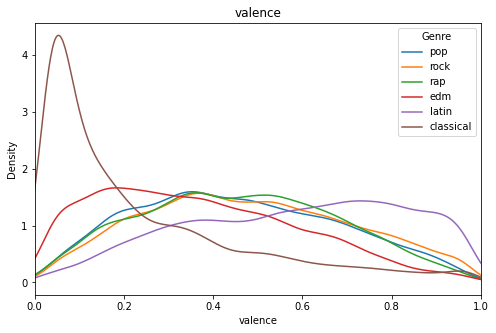

In [67]:
plt = plot_attribute('valence')
plt.xlim(0, 1)
plt.show()


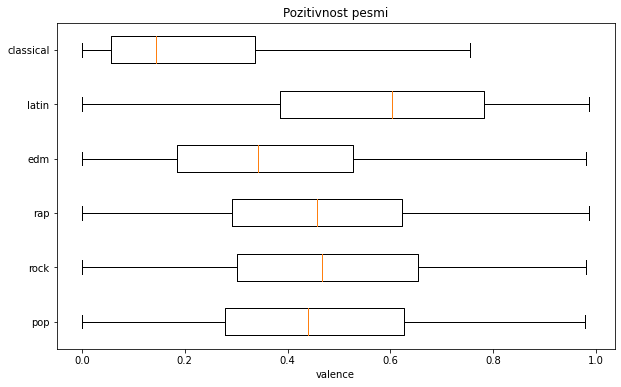

In [68]:
ax  = boxplot('valence')
ax.set_title("Pozitivnost pesmi")
plt.show()

# Duration
Values: mili seconds

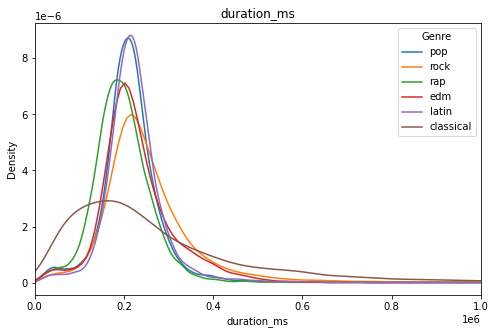

In [69]:
plt = plot_attribute('duration_ms')
plt.xlim(0, 1000000)
plt.show()

In [70]:
def boxplot_outliers(att, df_base):
    fig, ax = plt.subplots(figsize=(10, 6))
    df_genre1 = []
    df_genre2 = []

    for genre in genres:
        df = df_tracks.loc[df_tracks['genre'] == genre][att]
        df_genre1.append(df)
        df_genre2.append(remove_outliers(df))

    ax.set_xlabel(att)
    ax.set_yticklabels(genres)
    ax.boxplot(df_genre1, whis=16, vert=False)
    
    return ax, df_genre2

def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (df >= Q1 - 12 * IQR) & (df <= Q3 + 12 *IQR)
    return df.loc[filter]  

def remove_outliers_df(att, df_base, df_genre):
    df = pd.concat(df_genre)
    new_df = df_base.drop(att, axis=1)
    new_df = pd.merge(df, new_df, on='id', how='inner')
    return new_df

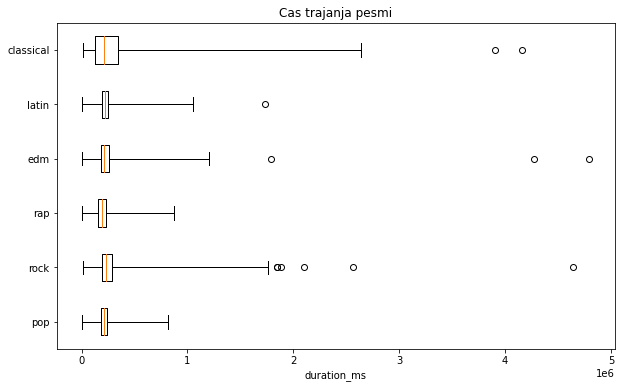

In [71]:
ax, df_genre = boxplot_outliers('duration_ms', df_tracks)
ax.set_title("Cas trajanja pesmi")
plt.show()

In [72]:
max_dolzina = df_tracks['duration_ms'].max()
min_dolzina = df_tracks['duration_ms'].min()

print("Max dolzina: %dms (%ds) (%d min)" % (max_dolzina, max_dolzina/1000, max_dolzina/1000/60))
print("Min dolzina: %dms (%ds) (%d min)" % (min_dolzina, min_dolzina/1000, min_dolzina/1000/60))

Max dolzina: 4794399ms (4794s) (79 min)
Min dolzina: 3677ms (3s) (0 min)


Pri dolzini trajanja pesmi opazimo nekaj osamelcev. 

Maksimalen cas trajanja pesmi 79 min. 
Minimalen cas pa pesmi 3s.

In [73]:
new_df = remove_outliers_df('duration_ms', df_tracks, df_genre)
new_df.shape[0]

83680

In [74]:
print(df_tracks.shape[0] - new_df.shape[0])

18


Se dodatmo omejimo min in max trajanja pesmi, ki jib bomo imeli v data setu.

In [75]:
new_df = new_df[new_df['duration_ms'] > 52800]  
new_df = new_df[new_df['duration_ms'] < 1280000]  

In [76]:
print(df_tracks.shape[0] - new_df.shape[0])

1986


In [77]:
new_df["duration_ms"].mean()

241212.73836156257

In [78]:
new_df["duration_ms"].min()

52827

In [79]:
new_df["duration_ms"].max()

1279467

In [80]:
max_dolzina = new_df['duration_ms'].max()
min_dolzina = new_df['duration_ms'].min()

print("Max dolzina: %dms (%ds) (%d min)" % (max_dolzina, max_dolzina/1000, max_dolzina/1000/60))
print("Min dolzina: %dms (%ds) (%d min)" % (min_dolzina, min_dolzina/1000, min_dolzina/1000/60))

Max dolzina: 1279467ms (1279s) (21 min)
Min dolzina: 52827ms (52s) (0 min)


Po omejitvi z min in max, dobimo bolj realne vrednosti za min in max trajanje pesmi. 

Novi min: 52s 

Novi max: 21min

In [81]:
# Normalize tempo
new_df = normalize("duration_ms", new_df)

In [82]:
new_df["duration_ms"].mean()

0.15357866885277163

# Key
Value: -1 to 11

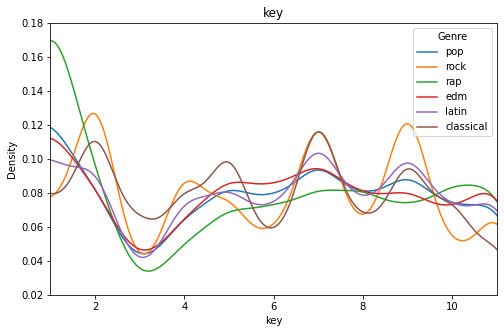

In [83]:
plt = plot_attribute('key')
plt.ylim(0.02, 0.18)
plt.xlim(1, 11)
plt.show()

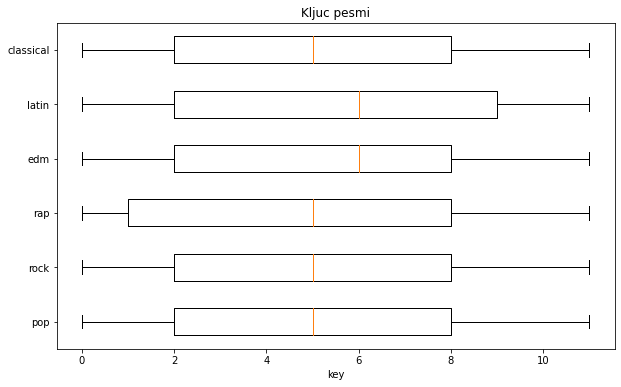

In [84]:
ax = boxplot('key')
ax.set_title("Kljuc pesmi")
plt.show()

# Mode
Value: 0.0 - 1.0

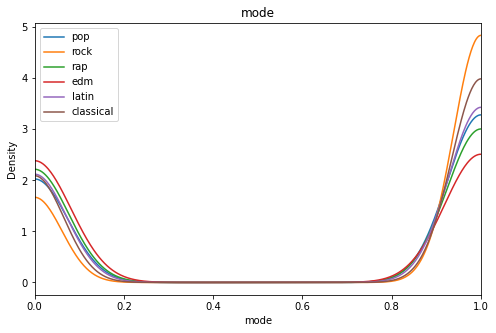

In [85]:
plt = plot_attribute('mode')
plt.xlim(0, 1)
plt.legend(loc=2)
plt.show()

In [120]:
att1 = ['speechiness', 'danceability', 'energy', 'instrumentalness']
att2 = ['acousticness', 'liveness', 'valence', 'mode']
att3 = ['loudness', 'duration_ms', 'key', 'tempo']

def subplot_attribute(att, normalized):
    fig, axes = plt.subplots(2,2, figsize=(14, 10))
    for index, at in enumerate(att):
        row = index // 2
        col = index % 2
        for genre in genres:
            df = df_tracks.loc[df_tracks['genre'] == genre][at]
            df.plot(kind='density', ax=axes[row, col], label=genre)
              
        axes[row, col].set_title(at, fontsize=16)
        if normalized:
            axes[row, col].set_xlim(0, 1)
    
    axes[0, 0].legend(title="Genre", bbox_to_anchor=(2.65, 0.2), fontsize=15)
    
    return axes   

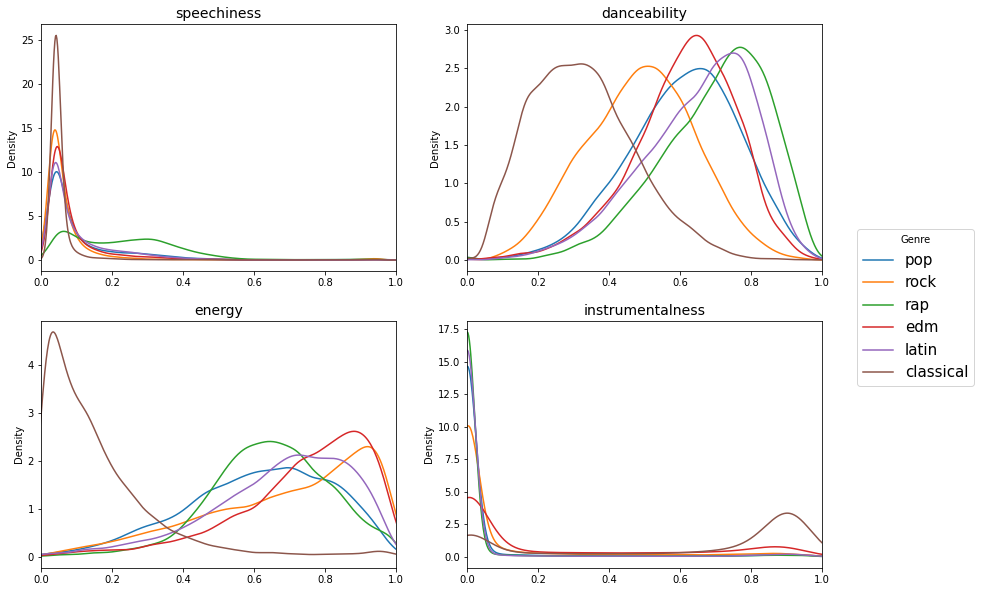

In [117]:
axes = subplot_attribute(att1, True)

Na 1. grafu opazujemo delez govora v pesmih. Opazimo, da se od vseh najbolj razlikuje rap, ki ima vecji delez govora v pesmih. 

Na 2. grafu opazujemo moznost plesanja na pesem. Opazimo, da najbolj izstopa klasika, z manjso vrednostjo, za njo pa sledi rock. 
Iz tega razberemo, da je v zranih klasike in rapa manj moznosti plesanja, kot pa pri dtugih grafih.

Na 3. prikazujemo energijo v pesmi. Opazimo, da dalec najbolj izstopa klasika, z najmanjso energijo in drugem koncu pa sta edm in rock z najvisjo energijo. 

Na 4. grafu prikazujemo instrumentalnost v pesmi (uporaba instrumentov). Opazimo, da ima klasika najvecji delez instrumentalnosti, drugi zanri pa so blizu 0.

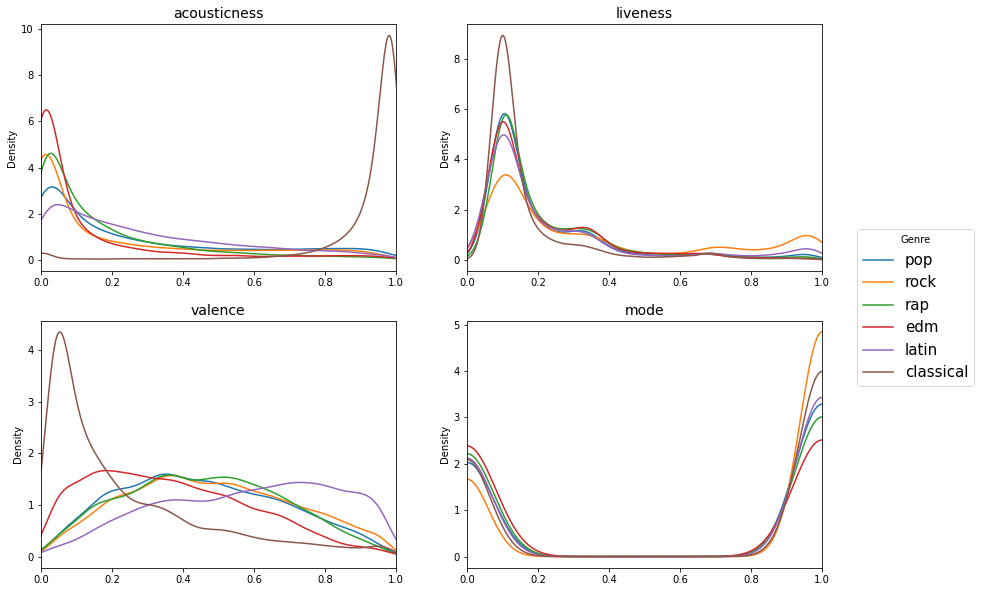

In [118]:
axes = subplot_attribute(att2, True)

Na 5. grafu opazujemo akusticnost v pesmih. Opazimo, kar smo isto opazili pri grafu instrumentalnosti. Klasika ima najvecji delez akusticnosti, vsi drugi zanri pa so blizu 0.

Na 6. grafu opazujemo moznost izvedbe pesmi pred publiko. Opazimo, da najbolj izstopa rock, pomeni, da imajo rock pesmi najvec moznosti, da so se izvedle v zivo pred publiko.

Na 7. grafu opazujemo pocutje v pesmi (zalostno/veselo). Opazimo, da je bol zalostno vzdusje v klasikah. Na drugem koncu opazimo, da je zelo veselo vzdusje v latino pesmih. Vsi drugi zanri pa so nekje umes.

Na 8. grafu opazujemo tonaliteto (dur / mol) pesmi. Opazimo, da so pesmi vseh zanrov 1 ali 0, brez posebnih izstopanj. S tem atributom, si bomo tezko pomagali pri kalsifikaciji, zato ga bomo izlocili.

(0.0, 1.0)

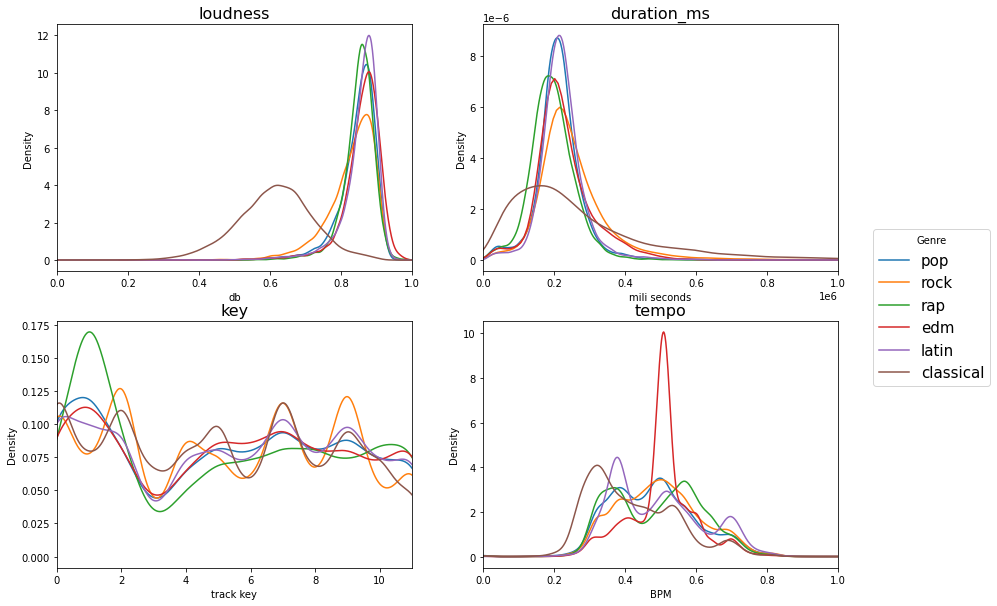

In [121]:
axes = subplot_attribute(att3, False)
axes[0, 0].set_xlabel("db")
axes[0, 0].set_xlim(0, 1)
axes[0, 1].set_xlabel("mili seconds")
axes[0, 1].set_xlim(0, 1000000)
axes[1, 0].set_xlabel("track key")
axes[1, 0].set_xlim(0, 11)
axes[1, 1].set_xlabel("BPM")
axes[1, 1].set_xlim(0, 1)

Na 9. grafu opazujemo glasnost pesmi. Opazimo, da spet najbolj izstopa klasika, kjer so pesmi nekoliko tisje kot pa v drugih zanrih.

Na 10. grafu opazujemo cas trjanja pesmi. Opazimo, da je cas trajanja pri pesmih klasike v povprecju malo manjsi in malo daljsi od drugih zanrov. Pesmi vseh drugih zanrov pa so nekje pri 200000ms = 200s = 3.3 min.

Na 11. grafu opazujemo kljuc v katreme je pesem napisana. Ne opazimo nic posebnega, ne zgleda, da bi lahko po tem atributu locili en zanr od drugih, zato ga bomo odstranili pir pripravljnaju podatkov za kalsifikacijo. 

Na 12. grafu opazujemo tempo v pesmi. Opazimo, da njabolj izstopa tempo v EDM zanru. Opazimo, da je tudi najbolj specificen, medtem, ko je tempo vseh drugih zanrov nekako razporejen. 

In [131]:
att1 = ['speechiness', 'danceability', 'energy', 'instrumentalness', 'acousticness', 'liveness']
att2 = ['valence', 'mode', 'loudness', 'duration_ms', 'key', 'tempo']

def boxplot_attribute(att, normalized):
    fig, axes = plt.subplots(2,3, figsize=(25, 13))
    for index, at in enumerate(att):
        row = index // 3
        col = index % 3
        df_genre = []
        
        for genre in genres:
            if normalized:
                df = df_tracks.loc[df_tracks['genre'] == genre][at]
                df_genre.append(remove_outliers(df))
            else:
                df = new_df.loc[new_df['genre'] == genre][at]
                df_genre.append(remove_outliers(df))
            
        axes[row, col].boxplot(df_genre, showfliers=False, vert=False)
        axes[row, col].set_title(at, fontsize=18)
        axes[row, col].set_yticklabels(genres)
        
        if normalized:
            axes[row, col].set_xlim(0, 1)
    
    return axes 

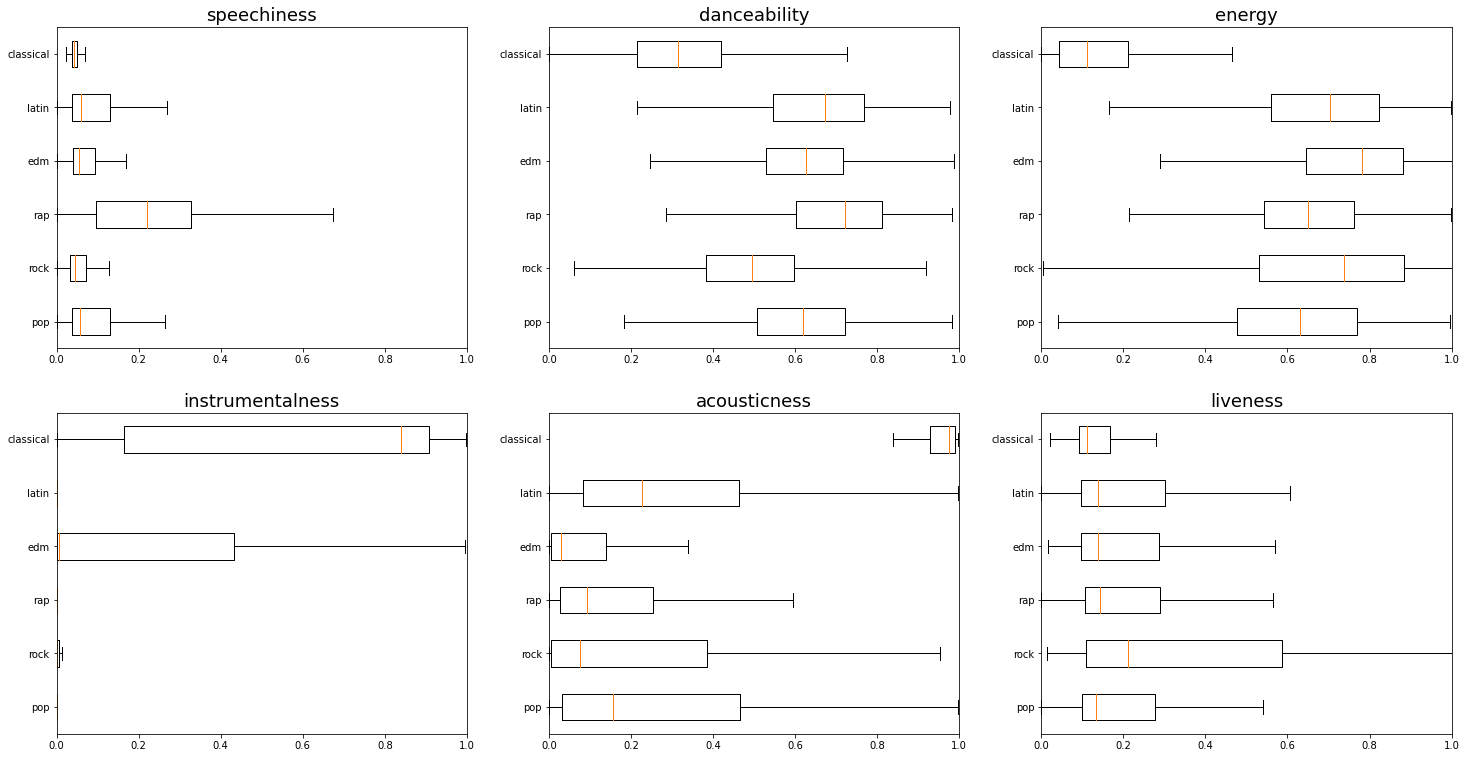

In [132]:
axes = boxplot_attribute(att1, True)

Se enkrat povzamemo, pri rapu je nekoliko vec govora kot pri drugih zanrih. Pri moznosti plesanja v pesmi, se od drugih zanrov locita najbolj kalsika in rock. Energija je najmanjsa v pesmih klasike, najvecja pa pri rocku in EDM. Insturmentalnost in akusticnost sta bolj znacilna za klasiko, drugi zanri zalo nizek delez teh atributov. Rock pesmi imajo vec moznosti, da so izvedene v zivo pred publiko.

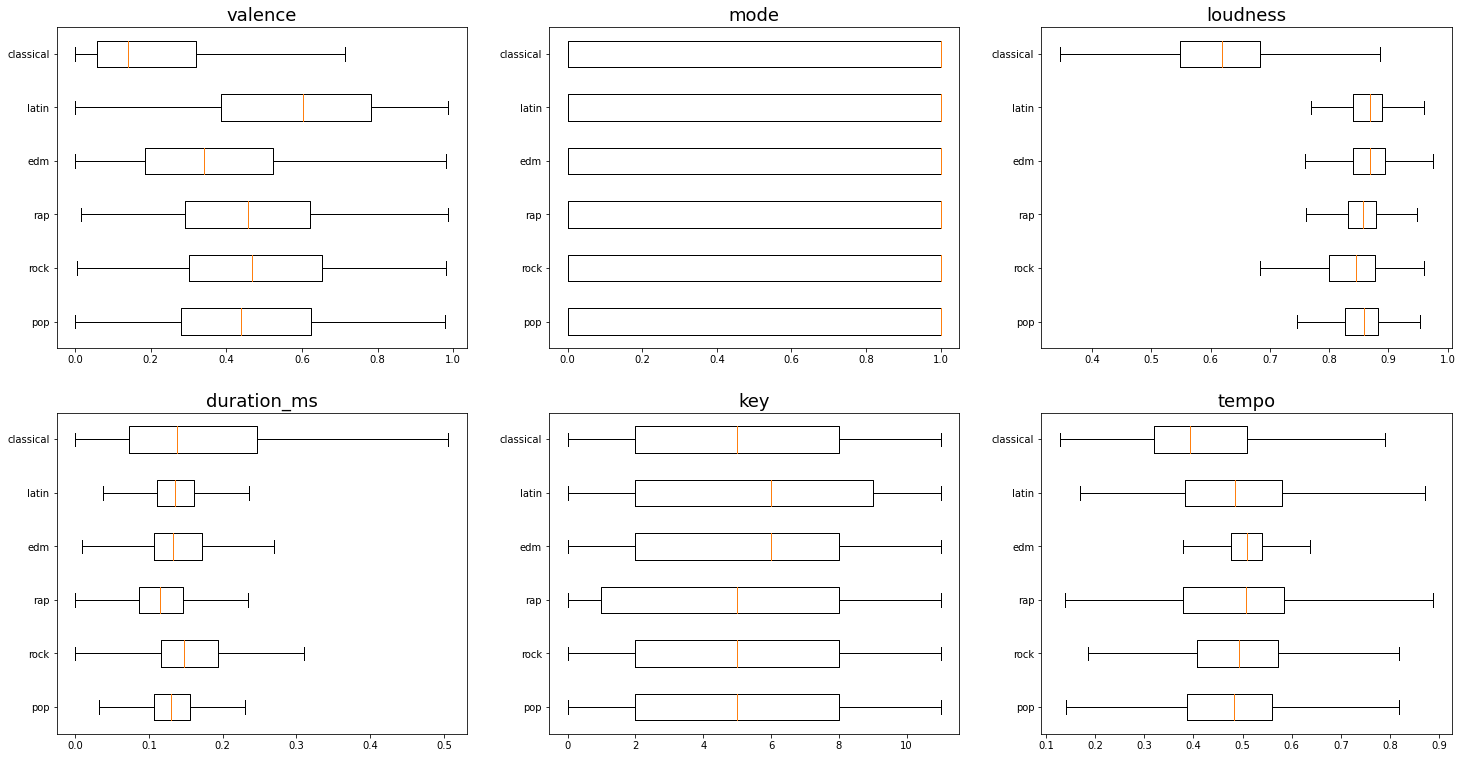

In [133]:
axes = boxplot_attribute(att2, False)

Pocutje v klasikah je bolj zalostno, bolj veselo pa je pri pesmih latino zanra, to opazimo pri atributu pocutja. Pri glasnosti najbloj izstopa klasika, ki je tisja od drugih zanrov. Pri casu trajnja iztopa klasika, ki ima vecji razopn trajanja, vsi drugi zanri pa imajo manjsi razpon. Tempo je najbloj specificen pri EDM zanru, vsi drugi zanri imajo vecji razpon, klasika pa pa se od drugih loci po nizjem tempu. S tonaliteto (mode) in kljucem (key) pesmi pa nimamo nekega vzorca, zato sta ta atributa nepomembna pri kalsifikaciji in ju bomo odstranili.

In [135]:
# nepotrebni atributi
columns_to_drop = ['mode', 'key', 'time_signature']
new_df = new_df.drop(columns_to_drop, axis=1)
new_df.head()

,duration_ms,tempo,loudness,name,artist_id,genre,album_id,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
id,,,,,,,,,,,,,,
6lzc0Al0zfZOIFsFvBS1ki,0.197765,0.523897,0.877560,State Of Grace (Taylor's Version),06HL4z0CvFAxyc27GXpf02,pop,6kZ42qRrzov54LcAk4onW9,0.594,0.713,0.0503,0.000328,0.000000,0.1140,0.328
4OAuvHryIVv4kMDNSLuPt6,0.138807,0.504100,0.884075,Red (Taylor's Version),06HL4z0CvFAxyc27GXpf02,pop,6kZ42qRrzov54LcAk4onW9,0.516,0.777,0.0375,0.001080,0.000002,0.0761,0.408
3S7HNKPakdwNEBFIVTL6dZ,0.154807,0.443377,0.858431,Treacherous (Taylor's Version),06HL4z0CvFAxyc27GXpf02,pop,6kZ42qRrzov54LcAk4onW9,0.645,0.593,0.0288,0.034400,0.000127,0.1300,0.299
6AtZLIzUINvExIUy4QhdjP,0.136090,0.620850,0.860598,I Knew You Were Trouble (Taylor's Version),06HL4z0CvFAxyc27GXpf02,pop,6kZ42qRrzov54LcAk4onW9,0.584,0.557,0.0342,0.012900,0.000000,0.0576,0.767
3nsfB1vus2qaloUdcBZvDu,0.225276,0.749706,0.837522,All Too Well (Taylor's Version),06HL4z0CvFAxyc27GXpf02,pop,6kZ42qRrzov54LcAk4onW9,0.440,0.528,0.0317,0.017100,0.002030,0.2340,0.132


Text(0.5, 1.0, 'Audio features correlation')

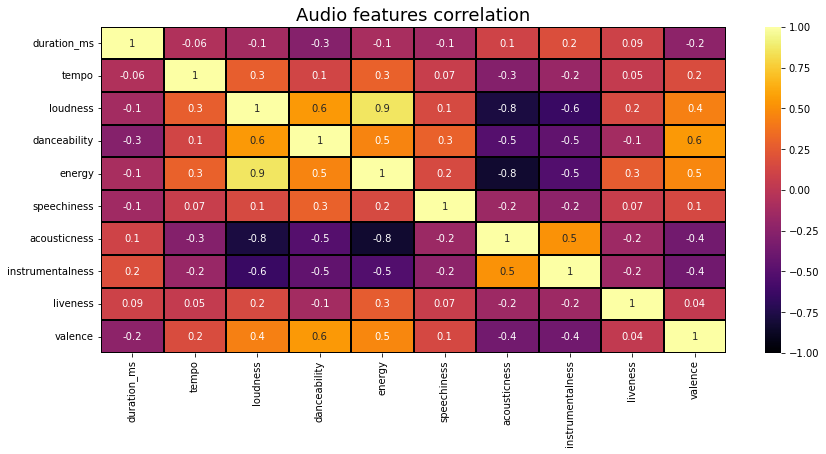

In [139]:
import seaborn as sns

to_drop = ['name', 'artist_id', 'album_id', 'genre']
corr_df=new_df.drop(to_drop, axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
plt.title("Audio features correlation", fontsize=18)

Pri grafu korelacij atributov, opazimo, da sta atributa energy in loudness zelo povezana (kolerirana). Vecja kot je glasnost pesmi, vecja bo energija. Povezana sta tudi moznost plesanja in glasnot, vecja kot bo glasnost, vecja bo moznost plesanja. Povezna sta tudi pocutje v glasi in moznost plesanja, ce bo pesem imela vecjo moznost plesanja, bo bolj vesela.

In [ ]:
# new_df.to_csv('Tracks_classification_5.csv')